In [1]:
import sys
sys.path.append("src")

import logging
logging.basicConfig(format='%(filename)s: '
                           '%(levelname)s: '
                           '%(funcName)s(): '
                           '%(lineno)d:\t'
                           '%(message)s')
from absl import flags
import tensorflow as tf

log = logging.getLogger('tensorflow')
log.setLevel('INFO')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
model_dir = 'outputs'
data_dir = ''
dataset = 'TOY'
noise_dim= 1

# GENERIC PARAMS
batch_size= 1024
d_optimizer= 'ADAM'
e_loss_lambda= 0.0
e_optimizer= 'ADAM'
encoder= 'ATTACHED'
eval_loss= True
g_optimizer= 'ADAM'
soft_label = 0

window_lambda = 0
use_wgan = 0
gcp_project= None
iterations_per_loop= 200
lambda_window= 1.0
learning_rate= 0.0002
noise_cov= 'IDENTITY'
num_eval_images= 1024
num_shards= None
num_viz_images= 100
reconstruction_loss= False
soft_label_strength= 0.2
tpu= ''
tpu_zone= 'us-central1-f'
train_steps_per_eval= 1000
use_encoder= False
use_tpu= False
use_window_loss= False
wgan_lambda= 10.0
wgan_n= 5
wgan_penalty= False

ignore_params_check = False


In [3]:
from model import ToyModel as Model
from datamanager.toydist_input_functions import generate_input_fn



import shutil
shutil.rmtree('outputs')

##### START
model = Model(model_dir=model_dir, data_dir=data_dir, dataset=dataset,
            # Model parameters
            learning_rate=learning_rate, batch_size=batch_size, noise_dim=noise_dim,
            noise_cov=noise_cov, soft_label_strength=soft_label,
            use_window_loss=use_window_loss, lambda_window=window_lambda,
            # WGAN
            use_wgan_penalty=use_wgan, wgan_lambda=wgan_lambda, wgan_n=wgan_n,
            # Encoder
            use_encoder=use_encoder, encoder=encoder, e_loss_lambda=e_loss_lambda,
            # ¯\_(ツ)_/¯
            reconstruction_loss=reconstruction_loss,
            # Optimizers
            g_optimizer=g_optimizer, d_optimizer=d_optimizer, e_optimizer=e_optimizer,
            # Training and prediction settings
            iterations_per_loop=iterations_per_loop, num_viz_images=num_viz_images,
            # Evaluation settings
            eval_loss=eval_loss, train_steps_per_eval=train_steps_per_eval,
            num_eval_images=num_eval_images,
            # TPU settings
            use_tpu=use_tpu, tpu=tpu, tpu_zone=tpu_zone,
            gcp_project=gcp_project, num_shards=num_shards,
            ignore_params_check=ignore_params_check)
model.build_model()

tf_logging.py: INFO: info(): 115:	Current parameters: {'batch_size': 1024,
 'd_optimizer': 'ADAM',
 'data_dir': '',
 'dataset': 'TOY',
 'e_loss_lambda': 0.0,
 'e_optimizer': 'ADAM',
 'encoder': 'ATTACHED',
 'eval_loss': True,
 'g_optimizer': 'ADAM',
 'gcp_project': None,
 'iterations_per_loop': 200,
 'lambda_window': 0,
 'learning_rate': 0.0002,
 'model_dir': 'output/ToyModel_z1_AAA_lr0.0002',
 'noise_cov': 'IDENTITY',
 'noise_dim': 1,
 'num_eval_images': 1024,
 'num_shards': None,
 'num_viz_images': 100,
 'reconstruction_loss': False,
 'soft_label_strength': 0,
 'tpu': '',
 'tpu_zone': 'us-central1-f',
 'train_steps_per_eval': 1000,
 'use_encoder': False,
 'use_tpu': False,
 'use_window_loss': False,
 'wgan_lambda': 10.0,
 'wgan_n': 5,
 'wgan_penalty': 0}
tf_logging.py: WARNING: warning(): 125:	Folder exists but without parameters. The code is gonna run assuming the parameters were the same (but using the ones defined on this session).
tf_logging.py: INFO: info(): 115:	Start
tf_loggin

In [4]:
model.train(50000, generate_input_fn)

tf_logging.py: INFO: info(): 115:	Starting training for 50000 steps, current step: 0
tf_logging.py: INFO: info(): 115:	Step: 0  -- (Next checkpoint 1000)
tf_logging.py: INFO: info(): 115:	['train.tfrecords']
tf_logging.py: INFO: info(): 115:	Calling model_fn.
tf_logging.py: INFO: info(): 115:	Running train on CPU
tf_logging.py: INFO: info(): 115:	Done calling model_fn.
tf_logging.py: INFO: info(): 115:	Create CheckpointSaverHook.
tf_logging.py: INFO: info(): 115:	Graph was finalized.
tf_logging.py: INFO: info(): 115:	Running local_init_op.
tf_logging.py: INFO: info(): 115:	Done running local_init_op.
tf_logging.py: INFO: info(): 115:	Saving checkpoints for 0 into output/ToyModel_z1_AAA_lr0.0002/model.ckpt.
tf_logging.py: INFO: info(): 115:	global_step/sec: 59.5495
tf_logging.py: INFO: info(): 115:	examples/sec: 60978.7
tf_logging.py: INFO: info(): 115:	global_step/sec: 92.5305
tf_logging.py: INFO: info(): 115:	examples/sec: 94751.2
tf_logging.py: INFO: info(): 115:	global_step/sec: 95.

tf_logging.py: INFO: info(): 115:	examples/sec: 93054.9
tf_logging.py: INFO: info(): 115:	global_step/sec: 90.7189
tf_logging.py: INFO: info(): 115:	examples/sec: 92896.1
tf_logging.py: INFO: info(): 115:	global_step/sec: 91.1341
tf_logging.py: INFO: info(): 115:	examples/sec: 93321.3
tf_logging.py: INFO: info(): 115:	global_step/sec: 92.7563
tf_logging.py: INFO: info(): 115:	examples/sec: 94982.4
tf_logging.py: INFO: info(): 115:	Saving checkpoints for 3000 into output/ToyModel_z1_AAA_lr0.0002/model.ckpt.
tf_logging.py: INFO: info(): 115:	Loss for final step: 0.69314635.
tf_logging.py: INFO: info(): 115:	training_loop marked as finished
tf_logging.py: INFO: info(): 115:	Finished training step 3000
tf_logging.py: INFO: info(): 115:	['train.tfrecords']
tf_logging.py: INFO: info(): 115:	Calling model_fn.
tf_logging.py: INFO: info(): 115:	Running eval on CPU
tf_logging.py: INFO: info(): 115:	Done calling model_fn.
tf_logging.py: INFO: info(): 115:	Starting evaluation at 2019-02-26-14:46:2

tf_logging.py: INFO: info(): 115:	Saving dict for global step 5000: discriminator_accuracy = 0.49994606, discriminator_loss = 1.3865106, generator_loss = 0.6929169, global_step = 5000, loss = 0.6929169
tf_logging.py: INFO: info(): 115:	Saving 'checkpoint_path' summary for global step 5000: output/ToyModel_z1_AAA_lr0.0002/model.ckpt-5000
tf_logging.py: INFO: info(): 115:	evaluation_loop marked as finished
tf_logging.py: INFO: info(): 115:	Finished evaluating
tf_logging.py: INFO: info(): 115:	{'discriminator_accuracy': 0.49994606, 'discriminator_loss': 1.3865106, 'generator_loss': 0.6929169, 'loss': 0.6929169, 'global_step': 5000}
tf_logging.py: INFO: info(): 115:	Step: 5000  -- (Next checkpoint 6000)
tf_logging.py: INFO: info(): 115:	['train.tfrecords']
tf_logging.py: INFO: info(): 115:	Calling model_fn.
tf_logging.py: INFO: info(): 115:	Running train on CPU
tf_logging.py: INFO: info(): 115:	Done calling model_fn.
tf_logging.py: INFO: info(): 115:	Create CheckpointSaverHook.
tf_logging.

tf_logging.py: INFO: info(): 115:	global_step/sec: 58.8601
tf_logging.py: INFO: info(): 115:	examples/sec: 60272.7
tf_logging.py: INFO: info(): 115:	global_step/sec: 96.0391
tf_logging.py: INFO: info(): 115:	examples/sec: 98344.1
tf_logging.py: INFO: info(): 115:	global_step/sec: 93.3952
tf_logging.py: INFO: info(): 115:	examples/sec: 95636.7
tf_logging.py: INFO: info(): 115:	global_step/sec: 94.7761
tf_logging.py: INFO: info(): 115:	examples/sec: 97050.7
tf_logging.py: INFO: info(): 115:	global_step/sec: 92.0726
tf_logging.py: INFO: info(): 115:	examples/sec: 94282.3
tf_logging.py: INFO: info(): 115:	global_step/sec: 96.1232
tf_logging.py: INFO: info(): 115:	examples/sec: 98430.2
tf_logging.py: INFO: info(): 115:	global_step/sec: 92.1451
tf_logging.py: INFO: info(): 115:	examples/sec: 94356.6
tf_logging.py: INFO: info(): 115:	global_step/sec: 91.3378
tf_logging.py: INFO: info(): 115:	examples/sec: 93529.9
tf_logging.py: INFO: info(): 115:	global_step/sec: 96.7721
tf_logging.py: INFO: 

tf_logging.py: INFO: info(): 115:	['train.tfrecords']
tf_logging.py: INFO: info(): 115:	Calling model_fn.
tf_logging.py: INFO: info(): 115:	Running eval on CPU
tf_logging.py: INFO: info(): 115:	Done calling model_fn.
tf_logging.py: INFO: info(): 115:	Starting evaluation at 2019-02-26-14:48:31
tf_logging.py: INFO: info(): 115:	Graph was finalized.
tf_logging.py: INFO: info(): 115:	Restoring parameters from output/ToyModel_z1_AAA_lr0.0002/model.ckpt-10000
tf_logging.py: INFO: info(): 115:	Running local_init_op.
tf_logging.py: INFO: info(): 115:	Done running local_init_op.
tf_logging.py: INFO: info(): 115:	Evaluation [1/1]
tf_logging.py: INFO: info(): 115:	Finished evaluation at 2019-02-26-14:48:32
tf_logging.py: INFO: info(): 115:	Saving dict for global step 10000: discriminator_accuracy = 0.50011444, discriminator_loss = 1.385835, generator_loss = 0.6936084, global_step = 10000, loss = 0.6936084
tf_logging.py: INFO: info(): 115:	Saving 'checkpoint_path' summary for global step 10000: ou

tf_logging.py: INFO: info(): 115:	Step: 12000  -- (Next checkpoint 13000)
tf_logging.py: INFO: info(): 115:	['train.tfrecords']
tf_logging.py: INFO: info(): 115:	Calling model_fn.
tf_logging.py: INFO: info(): 115:	Running train on CPU
tf_logging.py: INFO: info(): 115:	Done calling model_fn.
tf_logging.py: INFO: info(): 115:	Create CheckpointSaverHook.
tf_logging.py: INFO: info(): 115:	Graph was finalized.
tf_logging.py: INFO: info(): 115:	Restoring parameters from output/ToyModel_z1_AAA_lr0.0002/model.ckpt-12000
tf_logging.py: INFO: info(): 115:	Running local_init_op.
tf_logging.py: INFO: info(): 115:	Done running local_init_op.
tf_logging.py: INFO: info(): 115:	Saving checkpoints for 12000 into output/ToyModel_z1_AAA_lr0.0002/model.ckpt.
tf_logging.py: INFO: info(): 115:	global_step/sec: 57.8428
tf_logging.py: INFO: info(): 115:	examples/sec: 59231
tf_logging.py: INFO: info(): 115:	global_step/sec: 75.9688
tf_logging.py: INFO: info(): 115:	examples/sec: 77792
tf_logging.py: INFO: info

KeyboardInterrupt: 

In [5]:
log.setLevel('CRITICAL')
def get_sample(i):
    input_fn = lambda params: {'random_noise' : tf.constant([[i]], dtype=tf.float32)}
    return next(model.est.predict(input_fn))['generated_images']

In [6]:
samples = [get_sample(i) for i in tqdm(np.linspace(-1, 1, 200))]
samples = np.vstack(samples)

100%|██████████| 200/200 [00:53<00:00,  3.74it/s]


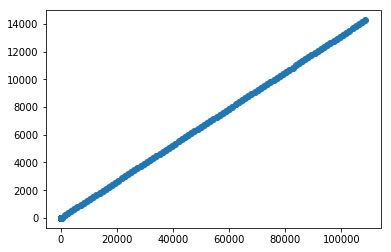

In [7]:

plt.figure()
plt.scatter(samples[:,0], samples[:,1])

In [11]:
get_sample(0)

array([-2.2500953e-05, -1.1133615e-05], dtype=float32)